<a href="https://colab.research.google.com/github/Arnold-git/Arnold-git/blob/main/down_hole_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bottom Hole Pressure/Volve production data.xlsx')

In [4]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [5]:
df.shape

(15634, 24)

In [7]:
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [6]:
df.tail()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.27272,0.636088,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.28686,0.670794,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.28604,0.664393,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.27212,0.624660,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP
15633,2016-09-18,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.0,injection,WI


In [8]:
df['AVG_DOWNHOLE_PRESSURE'].dtype

dtype('float64')

## Data Preprocessing

#### Drop all Down hole presure less than zero or equal to zero


In [9]:
df = df.loc[df['AVG_DOWNHOLE_PRESSURE'] > 0]

In [16]:
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [10]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
5,2014-04-12,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.50078,96.92339,281.44744,0.0,3.087015,%,22.05334,8.70429,22.05334,0.0,0.0,0.0,NaN,production,OP
6,2014-04-13,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.53481,96.95885,276.03200,0.0,1.962365,%,27.50281,9.42315,16.16326,0.0,0.0,0.0,NaN,production,OP
7,2014-04-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.78228,96.96873,282.78676,0.0,0.000000,%,20.99552,8.13137,20.73712,0.0,0.0,0.0,NaN,production,OP
8,2014-04-15,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.85821,97.02136,289.94067,0.0,31.141856,%,13.91754,8.49833,12.18153,0.0,0.0,0.0,NaN,production,OP


In [25]:
df2 = df[['DATEPRD', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
   'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_OIL_VOL',
   'BORE_WAT_VOL', 'NPD_WELL_BORE_CODE']]

In [26]:
df2

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_OIL_VOL,BORE_WAT_VOL,NPD_WELL_BORE_CODE
4,2014-04-11,310.37614,96.87589,277.27826,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0,7405
5,2014-04-12,303.50078,96.92339,281.44744,3.087015,22.05334,8.70429,22.05334,0.0,0.0,0.0,7405
6,2014-04-13,303.53481,96.95885,276.03200,1.962365,27.50281,9.42315,16.16326,0.0,0.0,0.0,7405
7,2014-04-14,303.78228,96.96873,282.78676,0.000000,20.99552,8.13137,20.73712,0.0,0.0,0.0,7405
8,2014-04-15,303.85821,97.02136,289.94067,31.141856,13.91754,8.49833,12.18153,0.0,0.0,0.0,7405
...,...,...,...,...,...,...,...,...,...,...,...,...
8996,2016-09-13,345.90677,90.03433,345.90677,0.999251,0.00000,0.00000,13.97408,0.0,0.0,0.0,7289
8997,2016-09-14,345.90677,90.03433,345.90677,1.049490,0.00000,0.00000,14.06316,0.0,0.0,0.0,7289
8998,2016-09-15,345.90677,90.03433,345.90677,0.974846,0.00000,0.00000,14.17445,0.0,0.0,0.0,7289
8999,2016-09-16,345.90677,90.03433,345.90677,0.968742,0.00000,0.00000,14.23277,0.0,0.0,0.0,7289


In [30]:
df3 = df2.loc[df2['BORE_OIL_VOL'] > 0]

In [31]:
df3.head()

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_OIL_VOL,BORE_WAT_VOL,NPD_WELL_BORE_CODE
15,2014-04-22,289.421362,106.353209,182.059312,43.343451,107.362050,37.939251,78.935409,90439.09,631.47,0.0,7405
16,2014-04-23,270.239793,107.643779,171.052782,47.167523,99.187011,60.756579,70.627109,165720.39,1166.46,0.0,7405
17,2014-04-24,262.842747,107.869234,168.241977,47.732310,94.600770,63.046800,66.049151,221707.31,1549.81,0.0,7405
18,2014-04-25,255.526995,107.971137,165.538903,48.533769,89.988092,64.547229,61.405386,178063.52,1248.70,0.0,7405
19,2014-04-26,247.199052,108.052030,162.422242,49.844502,84.776810,65.723694,56.147906,192602.19,1345.78,0.0,7405


In [22]:
df['BORE_GAS_VOL'].value_counts()

0.00         725
182065.95      2
164001.71      2
25728.41       1
140177.35      1
            ... 
10185.48       1
34427.49       1
50820.51       1
41359.57       1
30077.04       1
Name: BORE_GAS_VOL, Length: 5942, dtype: int64

In [32]:
df3 = df2.loc[df2['BORE_WAT_VOL'] > 0]

In [34]:
df3.shape

(5569, 12)

In [36]:
df3.tail()

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_OIL_VOL,BORE_WAT_VOL,NPD_WELL_BORE_CODE
8923,2016-07-02,194.983953,106.517574,179.170590,31.575767,15.813363,49.020020,1.259761,23201.35,144.01,203.93,7289
8924,2016-07-03,194.977634,106.515586,179.204392,31.540612,15.773242,48.988494,1.198993,23068.07,145.22,202.93,7289
8925,2016-07-04,194.317112,106.521356,178.615149,31.522096,15.701963,50.103416,1.279639,23059.68,142.74,203.84,7289
8926,2016-07-05,195.207173,106.506781,179.598751,31.523457,15.608422,49.841092,1.204128,23090.47,144.46,202.76,7289
8927,2016-07-06,195.305708,106.507232,179.547756,24.922565,15.757952,48.734245,1.302808,17537.08,106.30,155.70,7289


In [42]:
df3['BORE_GAS_VOL'].value_counts()

182065.95    2
164001.71    2
192962.32    1
167738.30    1
88.63        1
            ..
199037.63    1
300070.08    1
10185.48     1
41359.57     1
150712.71    1
Name: BORE_GAS_VOL, Length: 5567, dtype: int64

In [45]:
df3 = df3.loc[df3['AVG_WHP_P'] > 0]

In [47]:
df3 = df3.loc[df3['BORE_OIL_VOL'] > 0]


Descriptive Statistics
---



In [49]:
df3.head(2)

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_OIL_VOL,BORE_WAT_VOL,NPD_WELL_BORE_CODE
46,2014-05-23,219.862926,107.867219,155.572074,46.284227,64.290852,49.052980,35.873077,108079.03,742.89,93.31,7405
47,2014-05-24,219.922991,107.882980,155.752739,46.242158,64.170252,54.690688,35.750710,108387.02,746.54,100.42,7405


In [48]:
df3.describe()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_OIL_VOL,BORE_WAT_VOL,NPD_WELL_BORE_CODE
count,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000
mean,241.581761,104.397816,193.802560,56.274609,47.783033,75.487722,18.604806,218806.171326,1497.791274,1643.887632,6059.772009
std,21.515763,3.914522,26.014429,32.845834,19.922531,16.874793,18.185933,204744.190710,1449.144991,1473.044953,867.599424
min,49.450440,20.959721,7.219360,0.600000,0.000067,7.036688,0.194397,28.860000,0.170000,0.010000,5351.000000
25%,223.749979,102.108715,171.467655,28.304236,31.878550,69.584006,3.336808,49352.545000,320.357500,150.117500,5351.000000
50%,243.615663,105.833478,190.806574,51.767704,40.505602,81.260264,11.227017,161619.060000,1051.370000,1303.405000,5599.000000
75%,258.138556,106.457362,214.277641,99.813017,60.646367,87.556848,28.427624,324804.942500,2220.900000,3120.342500,7078.000000
max,308.055940,108.502178,257.434314,100.000000,120.888576,93.509584,106.035140,835981.330000,5888.690000,8019.740000,7405.000000


### Normality Test

In [52]:
df3['DATEPRD'] = pd.to_datetime(df3['DATEPRD'])

In [55]:
df3.columns

Index(['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
       'BORE_GAS_VOL', 'BORE_OIL_VOL', 'BORE_WAT_VOL', 'NPD_WELL_BORE_CODE'],
      dtype='object')

In [56]:


df_month = df3.loc[df3.groupby(pd.Grouper(freq='M'))['AVG_DOWNHOLE_PRESSURE'].idxmax()]

In [57]:
df_month

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_OIL_VOL,BORE_WAT_VOL,NPD_WELL_BORE_CODE
DATEPRD,,,,,,,,,,,
2008-02-12,308.055940,104.418090,201.250000,14.484431,106.805939,16.294718,92.475107,38888.67,284.65,385.01,5599
2008-03-01,286.891593,105.909089,178.064762,31.061881,108.826830,74.604204,75.573165,447584.12,3068.48,0.46,5599
2008-04-01,270.359619,105.889148,172.928235,29.812027,97.431384,73.537127,66.386227,457837.18,3060.60,2.82,5599
2008-05-20,297.645970,72.715428,216.382013,42.159007,81.263957,80.580994,47.850673,741919.56,4885.56,9.45,5599
2008-06-01,279.419100,104.823350,188.029470,16.827690,91.389630,22.054890,72.697430,11729.20,22.94,0.04,5599
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-01,251.378686,105.294129,223.142554,100.000000,28.236131,82.243764,2.655629,77684.41,488.27,2417.32,7078
2016-07-01,269.892647,100.203321,238.911943,45.160793,30.980704,88.827264,5.323273,16369.86,102.89,2979.13,5351
2016-07-01,193.301846,106.538913,177.447030,31.058442,15.854815,49.112740,1.736589,23203.68,145.84,203.02,7289


In [59]:
from scipy import stats
x = df_month['AVG_DOWNHOLE_PRESSURE'].to_list()

stats.shapiro(x)

(0.9809377193450928, 0.009923617355525494)

In [60]:
stats.kstest(x, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

The **Shapiro–Wilk** test is more appropriate method for small sample sizes (<50 samples) although it can also be handling on larger sample size while **kolmogorov–Smirnov** test is used for n ≥50. For both of the above tests, null hypothesis states that data are taken from normal distributed population. When P > 0.05, null hypothesis accepted and data are called as normally distributed

In [65]:
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_OIL_VOL,BORE_WAT_VOL,NPD_WELL_BORE_CODE
AVG_DOWNHOLE_PRESSURE,1.000,-0.137,0.664,0.366,0.212,0.482,0.196,0.033,0.029,0.411,-0.499
AVG_DOWNHOLE_TEMPERATURE,-0.137,1.000,-0.325,-0.418,0.273,-0.338,0.295,0.241,0.243,-0.466,0.439
AVG_DP_TUBING,0.664,-0.325,1.000,0.683,-0.591,0.462,-0.590,-0.444,-0.447,0.759,-0.330
AVG_CHOKE_SIZE_P,0.366,-0.418,0.683,1.000,-0.496,0.686,-0.549,-0.062,-0.066,0.774,-0.522
AVG_WHP_P,0.212,0.273,-0.591,-0.496,1.000,-0.083,0.983,0.616,0.615,-0.548,-0.108
AVG_WHT_P,0.482,-0.338,0.462,0.686,-0.083,1.000,-0.160,0.304,0.296,0.684,-0.742
DP_CHOKE_SIZE,0.196,0.295,-0.590,-0.549,0.983,-0.160,1.000,0.547,0.545,-0.604,-0.012
BORE_GAS_VOL,0.033,0.241,-0.444,-0.062,0.616,0.304,0.547,1.000,0.998,-0.253,-0.390
BORE_OIL_VOL,0.029,0.243,-0.447,-0.066,0.615,0.296,0.545,0.998,1.000,-0.266,-0.388
BORE_WAT_VOL,0.411,-0.466,0.759,0.774,-0.548,0.684,-0.604,-0.253,-0.266,1.000,-0.548


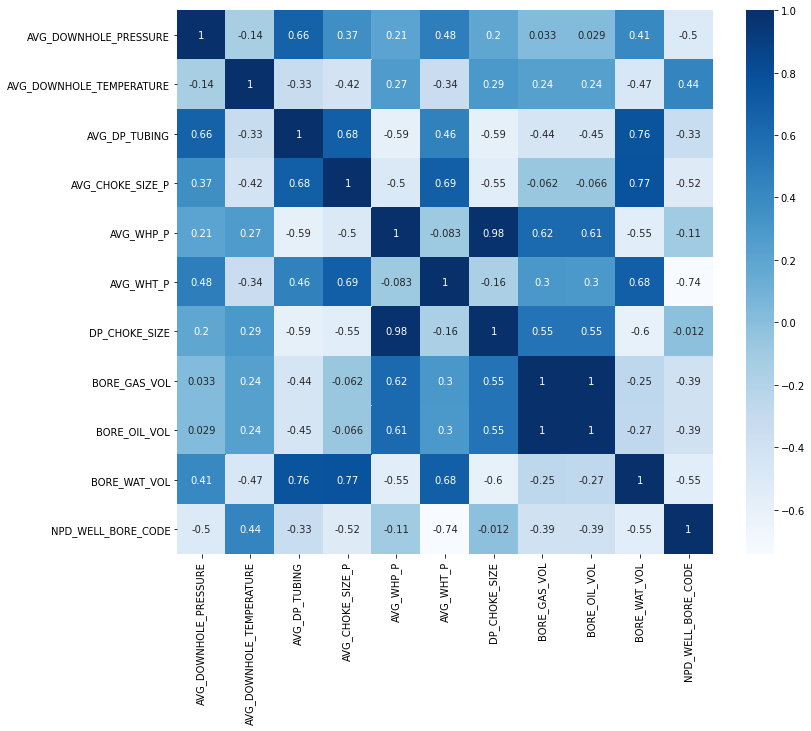

In [68]:
import seaborn as sns
corr = df3.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, cmap="Blues", annot=True)

### Outlier Detection

In [71]:
import numpy as np
Q1 = np.percentile(df3['AVG_DOWNHOLE_PRESSURE'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df3['AVG_DOWNHOLE_PRESSURE'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df3['AVG_DOWNHOLE_PRESSURE'], 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  223.7555209375
Q1 50 percentile of the given data is,  243.615663125
Q1 75 percentile of the given data is,  258.1354132291667
Interquartile range is 34.37989229166672


In [72]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 172.18568249999993
up_limit is 309.7052516666668


In [74]:

outlier =[]
for x in df3['AVG_DOWNHOLE_PRESSURE']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [142.19539375, 156.70460375223155, 126.43825649072753, 161.16830916666666, 131.50938291666668, 71.15459619560956, 49.450439538451974, 96.60870458333333, 135.62582895833333, 147.20070812765957, 164.07405290817022]


In [75]:
print('The number of outliers in this dataset is ==>', len(outlier))

The number of outliers in this dataset is ==> 11


In [76]:
df_new = df3[~df3['AVG_DOWNHOLE_PRESSURE'].isin(outlier)]

In [77]:
df_new.shape

(5555, 11)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
train, test = train_test_split(df_new, test_size=0.2, random_state=42, shuffle=True)


train.to_csv('/content/drive/MyDrive/Colab Notebooks/Bottom Hole Pressure//train.csv', index=False)
test.to_csv('/content/drive/MyDrive/Colab Notebooks/Bottom Hole Pressure//test.csv', index=False)

In [80]:
train.isnull().sum()

AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_GAS_VOL                0
BORE_OIL_VOL                0
BORE_WAT_VOL                0
NPD_WELL_BORE_CODE          0
dtype: int64

In [83]:
test.isnull().sum()

AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_GAS_VOL                0
BORE_OIL_VOL                0
BORE_WAT_VOL                0
NPD_WELL_BORE_CODE          0
dtype: int64

In [130]:

X = train.drop('AVG_DOWNHOLE_PRESSURE', axis = 1)
y = train['AVG_DOWNHOLE_PRESSURE']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', MinMaxScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [132]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [133]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.4336238389486956e-14
MSE: 1.924529555446904e-27
RMSE: 4.3869460396121855e-14
R2 Square 1.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.3938159362043606e-14
MSE: 1.8993942126875544e-27
RMSE: 4.358204002439026e-14
R2 Square 1.0
__________________________________


In [135]:

pred = lin_reg.predict(X_test)

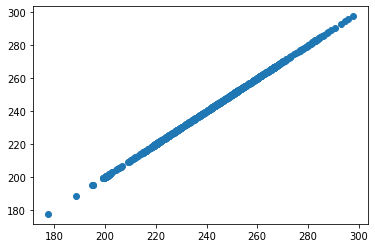

In [136]:
plt.scatter(y_test, pred)

In [137]:

coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
AVG_DOWNHOLE_TEMPERATURE,1.170461e-13
AVG_DP_TUBING,1.193464e+02
AVG_CHOKE_SIZE_P,-1.421085e-14
AVG_WHP_P,1.208885e+02
AVG_WHT_P,-1.030287e-13
DP_CHOKE_SIZE,-1.314504e-13
BORE_GAS_VOL,2.380318e-13
BORE_OIL_VOL,-1.918465e-13
BORE_WAT_VOL,4.618528e-14
NPD_WELL_BORE_CODE,-4.973799e-14


In [138]:

import seaborn as sns

In [139]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.433624e-14,1.924530e-27,4.386946e-14,1.0,1.0


In [140]:
test2 = test.drop('AVG_DOWNHOLE_PRESSURE', axis = 1)

In [141]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', MinMaxScaler())
])

test2 = pipeline.fit_transform(test2)


In [146]:

lin_reg_prediction =  lin_reg.predict(test2)

pred_df = pd.DataFrame(lin_reg_prediction, columns=['MLR_Pred_AVG_DHP'])

pred_df.tail(3)

,MLR_Pred_AVG_DHP
1108,229.345962
1109,252.328341
1110,211.555359


In [143]:
test.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_OIL_VOL,BORE_WAT_VOL,NPD_WELL_BORE_CODE
DATEPRD,,,,,,,,,,,
2015-12-14,266.196082,99.559042,238.012727,100.000000,28.183355,87.930346,1.979001,26908.07,177.31,3123.60,5351
2015-06-01,265.502420,99.519340,235.247186,100.000000,30.255234,86.691789,1.784515,31604.86,212.13,3575.05,5351
2009-12-03,243.218281,105.989281,178.405730,40.264494,64.812550,84.778802,32.192943,467067.52,3300.40,1595.67,5351
2015-04-25,243.699553,108.110749,204.347667,52.703812,39.351885,67.092811,10.419663,49280.04,340.53,822.81,7405
2013-04-18,242.469514,101.074942,208.137408,70.209588,34.332106,86.407296,5.277823,164156.91,1039.90,3391.98,5351


In [148]:
pred_df = pred_df.reset_index(drop = True)
test = test.reset_index(drop = True)

In [149]:

pred_df['AVG_DOWNHOLE_PRESSURE'] = test['AVG_DOWNHOLE_PRESSURE']

In [150]:
pred_df

,MLR_Pred_AVG_DHP,AVG_DOWNHOLE_PRESSURE
0,264.150476,266.196082
1,263.493669,265.502420
2,241.427828,243.218281
3,241.158622,243.699553
4,239.731601,242.469514
...,...,...
1106,222.837072,225.185911
1107,237.493148,240.462514
1108,229.345962,231.957339
1109,252.328341,254.154211


In [154]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.2625121545631656e-13
MSE: 1.737801121242778e-26
RMSE: 1.3182568494958704e-13
R2 Square 1.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.248156758445759e-13
MSE: 1.6961619858867712e-26
RMSE: 1.302367838165075e-13
R2 Square 1.0
__________________________________


In [155]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.433624e-14,1.924530e-27,4.386946e-14,1.0,1.0
1,Robust Regression,1.262512e-13,1.737801e-26,1.318257e-13,1.0,1.0
2,Robust Regression,1.262512e-13,1.737801e-26,1.318257e-13,1.0,1.0


In [156]:
robust_prediction =  model.predict(test2)

pred_df2 = pd.DataFrame(robust_prediction, columns=['RobReg_Pred_Rainfall'])

pred_df['RobReg_Pred_Rainfall'] = pred_df2['RobReg_Pred_Rainfall'] 
pred_df

,MLR_Pred_AVG_DHP,AVG_DOWNHOLE_PRESSURE,RobReg_Pred_Rainfall
0,264.150476,266.196082,264.150476
1,263.493669,265.502420,263.493669
2,241.427828,243.218281,241.427828
3,241.158622,243.699553,241.158622
4,239.731601,242.469514,239.731601
...,...,...,...
1106,222.837072,225.185911,222.837072
1107,237.493148,240.462514,237.493148
1108,229.345962,231.957339,229.345962
1109,252.328341,254.154211,252.328341


In [157]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.6742355557224647
MSE: 3.0741312059708306
RMSE: 1.7533200523494934
R2 Square 0.9931009386890588
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.21769924567840634
MSE: 0.27021448790054026
RMSE: 0.5198215923762116
R2 Square 0.999365878616562
__________________________________


In [158]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.433624e-14,1.924530e-27,4.386946e-14,1.000000,1.0
1,Robust Regression,1.262512e-13,1.737801e-26,1.318257e-13,1.000000,1.0
2,Robust Regression,1.262512e-13,1.737801e-26,1.318257e-13,1.000000,1.0
3,Random Forest Regressor,6.742356e-01,3.074131e+00,1.753320e+00,0.993101,0.0


In [160]:
rf_reg_prediction =  rf_reg.predict(test2)

pred_df2 = pd.DataFrame(rf_reg_prediction, columns=['rf_reg_Pred_Rainfall'])

pred_df['rf_reg_Pred_Rainfall'] = pred_df2['rf_reg_Pred_Rainfall'] 
pred_df

,MLR_Pred_AVG_DHP,AVG_DOWNHOLE_PRESSURE,RobReg_Pred_Rainfall,rf_reg_Pred_Rainfall
0,264.150476,266.196082,264.150476,265.411255
1,263.493669,265.502420,263.493669,263.652235
2,241.427828,243.218281,241.427828,239.523693
3,241.158622,243.699553,241.158622,241.498765
4,239.731601,242.469514,239.731601,240.378508
...,...,...,...,...
1106,222.837072,225.185911,222.837072,222.101712
1107,237.493148,240.462514,237.493148,237.723420
1108,229.345962,231.957339,229.345962,228.062478
1109,252.328341,254.154211,252.328341,251.624983
